In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the data
data = np.loadtxt('linear_regression.txt', delimiter = ',')
#separate predictor from target variable
X = np.c_[np.ones(data.shape[0]), data[:,0]]
          
y = np.c_[data[:,1]]

In [3]:
# First appraoch - Normal equation

def normalEquation(X,y):
    """
    Parameteres: input variables (Table) , Target vector
    Instructions: Complete the code to compute the closed form solution to linear regression and 	save the result in theta.
    Return: coefficinets 
    """
    Xt = np.transpose(X)
    Inverse = np.linalg.inv(Xt.dot(X))
    theta = Inverse.dot(Xt).dot(y)
    return theta

In [4]:
normalEquation(X,y)

array([[-3.89578088],
       [ 1.19303364]])

In [5]:
#(X.dot(np.ones((X.shape[1],y.shape[1])))-y).dot(np.ones((2,1)).T).sum(axis =0)
test = np.array((2,1)).reshape(2,1)
test[0]
(X.dot(np.ones((X.shape[1],y.shape[1])))-y)
#X[:,1].dot
(X.dot(test)-y)
(X.dot(test)-y)
(X[:,1].reshape(len(X),1)*(X.dot(test)-y)).sum(axis =0)/len(X)

array([32.39469308])

In [6]:
def gradient_descent(X,y,theta,num, learning_rate = 0.01):
    """
    Paramters: input variable , Target variable, theta, number of iteration, learning_rate
    Instructions: Complete the code to compute the iterative solution to linear regression, in each iteration you will 
    add the cost of the iteration to a an empty list name cost_hisotry and update the theta.
    Return: theta, cost_history 
    """
    cost_history = []
    theta_history = []
    
    for i in range(num):
        yp = X.dot(theta)
        N = y.shape[0]
        cost = np.sum((yp-y)**2)/2/N
        X_m = X[:,1].reshape(len(X),1)
        mgradient = 1/N*(X_m*(yp-y)).sum(axis =0)
        bgradient = 1/N*((yp-y).sum(axis =0))
        theta[1] = theta[1] -learning_rate* mgradient
        theta[0] = theta[0]- learning_rate* bgradient
        cost_history.append(cost)
        theta_history.append(theta)
        
        
    
    
        
    return  theta, cost_history,theta_history

Text(0, 0.5, 'Cost')

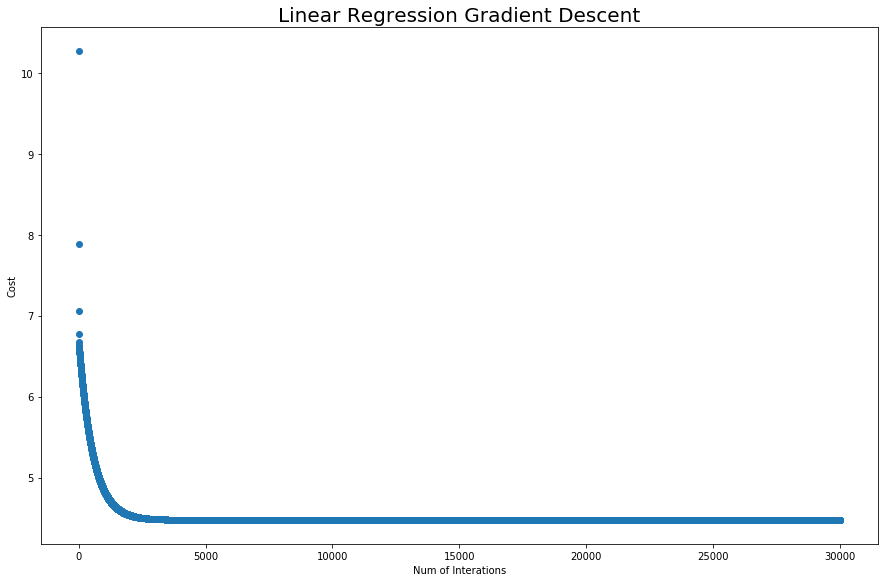

In [7]:
# Plot the cost over number of iterations
'''
Your plot should be similar to the provided plot
'''
Cost = gradient_descent(X,y,np.ones((2,1)),30000, learning_rate = 0.005)[1]
plt.figure(figsize = (15,9.5))
plt.scatter(np.arange(1,len(Cost)+1), Cost)
plt.title('Linear Regression Gradient Descent',fontsize =20)
plt.xlabel('Num of Interations')
plt.ylabel('Cost')

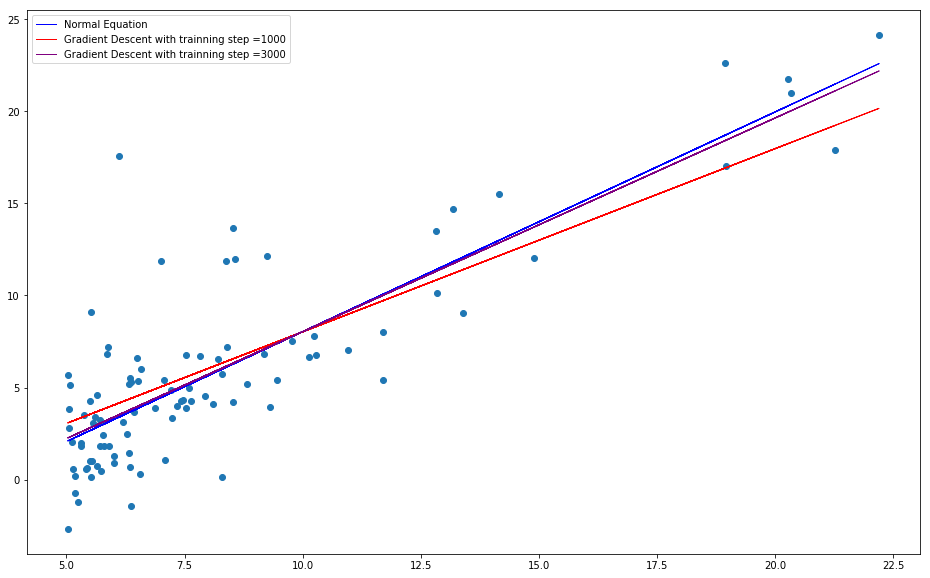

In [8]:
# Plot the linear regression line for both gradient approach and normal equation in same plot
'''
hints: your x-axis will be your predictor variable and y-axis will be your target variable. plot a
scatter plot and draw the regression line using the theta calculated from both approaches. Your plot
should be similar to what provided.
'''

plt.figure(figsize =(16,10))
#plt.scatter(X.dot(gradient_descent(X,y,np.ones((2,1)),2000, learning_rate = 0.005)[0]).tolist(),y.tolist())
plt.scatter(X[:,1],y)
y_pred1 = X.dot(normalEquation(X,y))
y_pred2 = X.dot(gradient_descent(X,y,np.ones((2,1)),1000, learning_rate = 0.005)[0])
y_pred3 = X.dot(gradient_descent(X,y,np.ones((2,1)),3000, learning_rate = 0.005)[0])
plt.plot(X[:,1], y_pred1 , color='blue', linewidth=1,label = 'Normal Equation')
plt.plot(X[:,1], y_pred2 , color='red', linewidth=1,label = 'Gradient Descent with trainning step =1000')
plt.plot(X[:,1], y_pred3 , color='purple', linewidth=1,label = 'Gradient Descent with trainning step =3000')
plt.legend()
#plt.plot(X[:,1],X[:,0]*theta1[0]+X[:,1]*theta1[1],color = 'red')

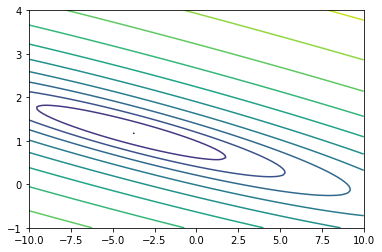

In [10]:
# Plot contour plot and 3d plot for the gradient descent approach
def costfunction(X,y,theta):
    m = np.size(y)
    error = y-X.dot(theta)
    J = ((error)**2).sum()*(1/2/m)  
    return J

t0, t1 = np.meshgrid(np.linspace(-10,10,100),np.linspace(-1,4,100))
zs = np.array(  [costfunction(X, y,np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(t0), np.ravel(t1)) ] )

Z = zs.reshape(t0.shape)
plt.contour(t0,t1,np.log(Z),10)

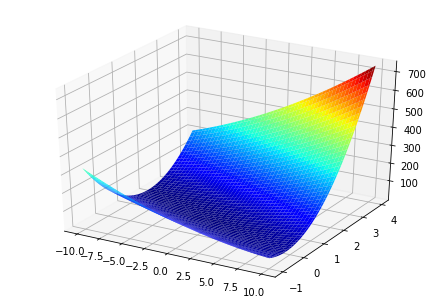

In [12]:
###
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(t0,t1,Z, cmap='jet')